<h1 style="background-color:DodgerBlue;"> Anamoly detection ||  Time series ➤ ARIMA </h1>

## 🚨  **Scenario: Detecting Anomalies in Daily Website Traffic **
- Goal: Identifying Unusual Traffic Patterns on an E-commerce Website


**Description**:  
In this scenario, we aim to monitor the daily number of visitors to an e-commerce website. A sudden surge or drop in traffic could indicate various events, such as:
- Marketing campaign launches 📢
- Technical issues 🛠️
- Bot attacks 🤖

By applying the **ARIMA model**, we can forecast expected traffic and flag significant deviations as anomalies.

### 📦 **1. Prepare the Data**

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Simulate daily website traffic data
np.random.seed(42)
date_range = pd.date_range(start="2023-01-01", periods=180, freq='D')
traffic = 500 + 50 * np.sin(np.linspace(0, 3 * np.pi, 180)) + np.random.normal(0, 20, 180)

# Introduce anomalies
traffic[30] = 800  # Spike
traffic[90] = 100  # Drop
traffic[150] = 750  # Spike

df = pd.DataFrame({'Date': date_range, 'Traffic': traffic})
df.set_index('Date', inplace=True)
df.index.freq = 'D' ## 👈 This sets the frequency explicitly and avoids the warning

df.head()



,Traffic
Date,
2023-01-01,509.934283
2023-01-02,499.866117
2023-01-03,518.209284
2023-01-04,538.325654
2023-01-05,505.769734


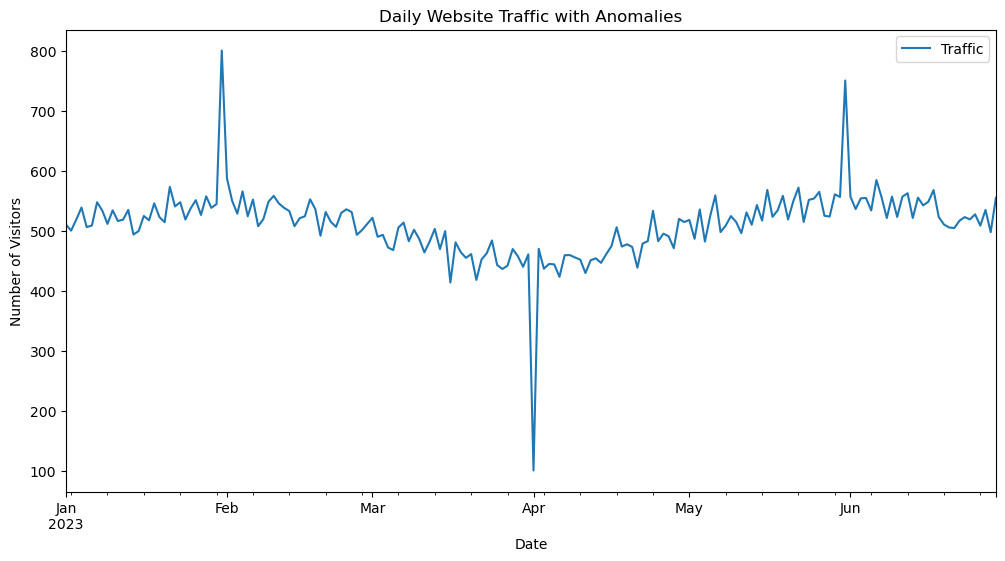

In [5]:
# Plot the data
df.plot(figsize=(12, 6))
plt.title('Daily Website Traffic with Anomalies')
plt.ylabel('Number of Visitors')
plt.xlabel('Date')
plt.show()

### 🔮 **2. Fit the ARIMA Model**

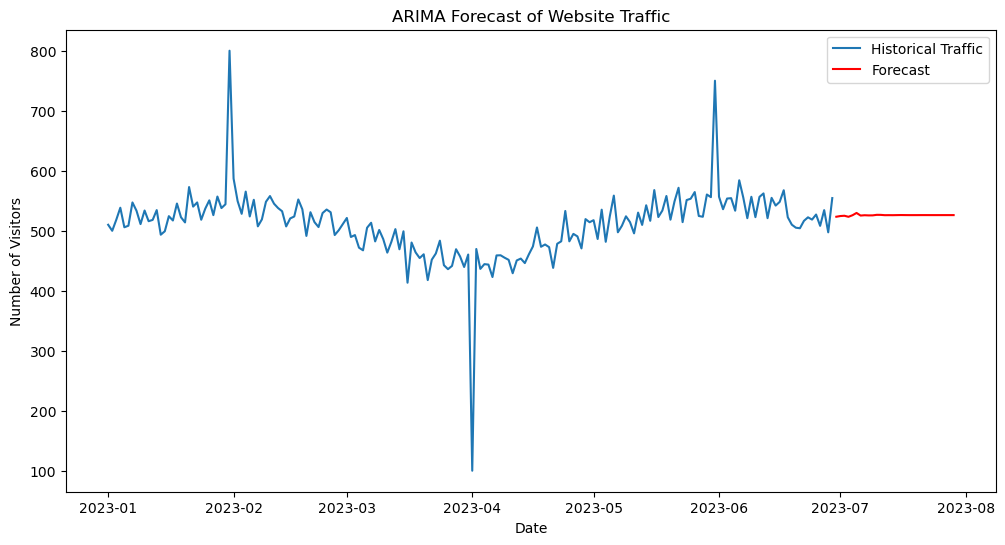

In [7]:
# Fit ARIMA model (p=5, d=1, q=0)
model = ARIMA(df['Traffic'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast the next 30 days
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Traffic'], label='Historical Traffic')
plt.plot(pd.date_range(df.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast of Website Traffic')
plt.ylabel('Number of Visitors')
plt.xlabel('Date')
plt.legend()
plt.show()

### 🚨 **3. Detect Anomalies**

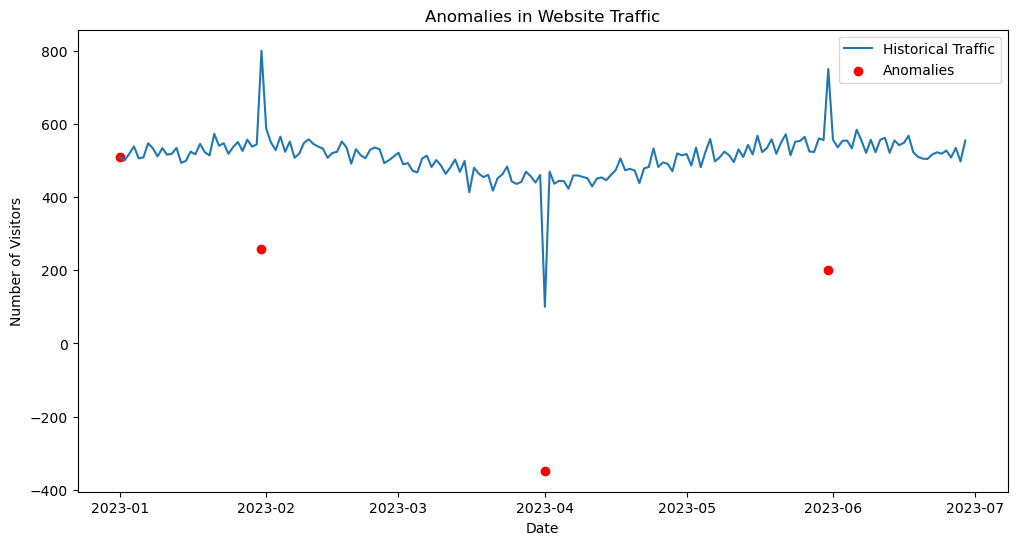

Detected Anomalies:
Date
2023-01-01    509.934283
2023-01-31    257.063460
2023-04-01   -348.052957
2023-05-31    199.330713
dtype: float64


In [8]:
# Calculate residuals
residuals = df['Traffic'] - model_fit.fittedvalues

# Calculate the standard deviation of residuals
std_residuals = np.std(residuals)

# Define a threshold for anomalies (e.g., 2 standard deviations)
threshold = 2 * std_residuals

# Identify anomalies
anomalies = residuals[abs(residuals) > threshold]

# Plot anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Traffic'], label='Historical Traffic')
plt.scatter(anomalies.index, anomalies, color='red', label='Anomalies')
plt.title('Anomalies in Website Traffic')
plt.ylabel('Number of Visitors')
plt.xlabel('Date')
plt.legend()
plt.show()

# Display anomalies
print("Detected Anomalies:")
print(anomalies)

### 📈 **4. Evaluate the Model**

In [9]:
# Calculate Mean Squared Error of the forecast
mse = mean_squared_error(df['Traffic'][-forecast_steps:], forecast)
print(f"Mean Squared Error of the forecast: {mse:.2f}")



Mean Squared Error of the forecast: 2283.54


### 🧪 **5. Test a New Traffic Sample**

In [11]:
# New traffic data point
new_traffic = 600
new_date = pd.Timestamp("2023-06-01")

# Predict the expected traffic for the new date
expected_traffic = model_fit.forecast(steps=1).iloc[0]

# Calculate the residual
residual = new_traffic - expected_traffic

# Check if the residual exceeds the threshold
if abs(residual) > threshold:
    print(f"Anomaly detected on {new_date.date()}! Residual: {residual:.2f}")
else:
    print(f"Normal traffic on {new_date.date()}. Residual: {residual:.2f}")


Normal traffic on 2023-06-01. Residual: 76.69
